## Semester 1 Project Submission

Please fill out:
* Student name: Sage Reagan, Neil Dilawari, Mahan Abbasian, Daniel Perez
* Instructor name: Charlie Rice, Lera Tsayukova



## Importing Python libraries

In [2]:
# In this cell we import the libraries needed for our analysis
# pandas for data frame manipulation and import
# sqlite3 for database connection, import and manipulation
# numpy for array-wise operations
# plt and sns for plotting data or data frames

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Importing csv / tsv files

In this step, we will import data using the pandas library.
For that, there are two alternatives to import data:
1. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz", encoding="unicode_escape") --> for compressed files
2. bomDF = pd.read_csv("zippedData/bom.movie_gross.csv") --> for uncompressed (raw) files

In [2]:
# DataFrame from Box Office Mojo dataset
bomDF = pd.read_csv("zippedData/bom.movie_gross.csv.gz",encoding="unicode_escape")

In [3]:
print(bomDF.shape)

(3387, 5)


In [4]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


## Importing SQL datset

Here, we import data from IMDB's SQLite database using sqlite3 library.

In [6]:
# DataFrame from IMDB dataset
conn = sqlite3.connect('zippedData/im.db')

In [6]:
movie_basicsDF = pd.read_sql("select * from movie_basics", con=conn)
movie_basicsDF.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [7]:
movie_ratingsDF = pd.read_sql("select * from movie_ratings", con=conn)
movie_ratingsDF.head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


## Daniel's Section: Relationship between genre and average rates/revenues

### a. Does a movie's genre have an impact in mean average rates?

- Step 1. Merging "movie_basics" and "movie_ratings" SQL tables

In [8]:
q = pd.read_sql("""

SELECT *
FROM movie_basics b
INNER JOIN movie_ratings r
ON b.movie_id = r.movie_id

;
""", con=conn)
q.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


- Step 2. Deleting rows with NAN values.

In [9]:
q['genres'].isna().sum()

804

In [10]:
q.dropna(subset=['genres'], inplace=True)

In [11]:
q['genres'].isna().sum()

0

- Step 3. Creating a subset with 10 items, with the highest average ratings. Then, plot the results.

In [70]:
qmaxr= q.groupby('genres',  as_index=False).mean().nlargest(5, 'averagerating')
qmaxr

,genres,start_year,runtime_minutes,averagerating,numvotes
449,"Comedy,Documentary,Fantasy",2015.0,70.0,9.4,5.0
633,"Documentary,Family,Musical",2017.0,59.0,9.3,19.0
851,"History,Sport",2016.0,NaN,9.2,5.0
837,Game-Show,2013.0,130.0,9.0,7.0
882,"Music,Mystery",2012.0,NaN,9.0,5.0


- Step 3. Creating a subset with 10 items, with the highest average ratings. Then, plot the results.

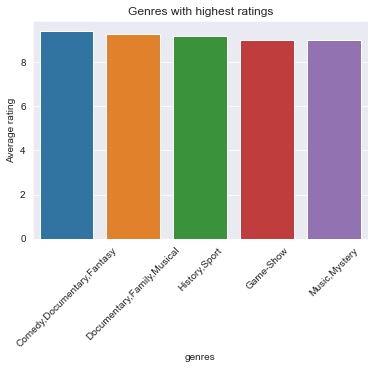

In [71]:
# Using seaborn library, we plot the 10 sample set from the dataset "q" with the highest average rating
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.barplot(x = 'genres', y = 'averagerating' , data = qmaxr)
plt.xticks(rotation=45);
plt.ylabel("Average rating");
plt.title("Genres with highest ratings");
plt.savefig("genres_high_ratings.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 4. Creating a subset with 10 samples, with the lowest average ratings. Then, plot the results.

In [68]:
qminr = q.groupby('genres',  as_index=False).mean().nsmallest(5, 'averagerating')
qminr

,genres,start_year,runtime_minutes,averagerating,numvotes
527,"Comedy,Musical,Sport",2015.0,101.0,1.4,28.0
153,"Adult,Horror",2015.0,120.0,2.0,128.0
195,"Adventure,Crime,Romance",2011.0,86.0,2.3,9.0
850,"History,Sci-Fi,Thriller",2017.0,120.0,2.3,227.0
594,"Crime,Music",2018.0,94.0,2.4,88.0


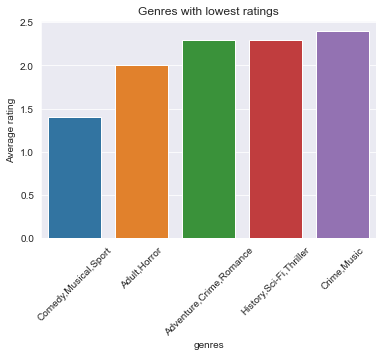

In [69]:
# Using seaborn library, we plot the 50 sample set from the dataset "q" with the lowest average rating.
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the average rating values.
sns.set_style("darkgrid")
sns.barplot(data=qminr, x="genres", y="averagerating");
plt.xticks(rotation=45);
plt.ylabel("Average rating");
plt.title("Genres with lowest ratings");
plt.savefig("genres_low_ratings.png",
            bbox_inches ="tight",
            orientation ='landscape');

#### What can be conclued for question a?
- For the highest average rating movies, DOCUMENTARY is the most common genre within our 50 samples. Moreover, it is combined with other genres like Drama, Music or Sport.
- For the lowest average rating movies, DRAMA is the most common genre within our 50 samples. Moreover, it is combined with other genres like Adventure, Horror or Thriller.

### b. Does a movie's genre have an impact in mean gross revenues?

- Step 1. Explore where to merge the dataframes (Where? Movie titles)

In [16]:
# df.head() gives by default the first 5 rows from the dataframe
# df.tail() gives by default the last 5 rows from the dataframe

In [17]:
q.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43


In [18]:
bomDF.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 2. Change name in bomDF['title'] column to bomDF['primary_title']

In [19]:
# For the dataframe merging to be successful, we must change the column name in any of the two dataframes.
bomDF.rename(columns = {'title':'primary_title'}, inplace = True)

In [20]:
bomDF.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


- Step 3. Merge (type: inner) the "q" dataframe with "bomDF" dataframe on 'primary_title'

In [21]:
# the df.merge() function joins 2 dataframes by the inner type (default) on the column we want it to ('primary_title')
full_merge = bomDF.merge(q,on='primary_title')

In [22]:
full_merge.head()

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",tt0892791,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",tt1325004,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690


- Step 4. Change full_merge['foreign_gross'] to float64, retire NaN values and then create a new column where domestic and foreign gross are summed.

In [23]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
object


In [24]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].replace(',','', regex=True)

In [25]:
full_merge['foreign_gross'] = full_merge['foreign_gross'].astype(float)

In [26]:
full_merge['foreign_gross'].isna().sum()

1195

In [27]:
full_merge.dropna(subset=['foreign_gross'], inplace=True)

In [28]:
full_merge['foreign_gross'].isna().sum()

0

In [29]:
print(full_merge['domestic_gross'].dtypes)
print(full_merge['foreign_gross'].dtypes)

float64
float64


In [30]:
full_merge['global_sum'] = full_merge['domestic_gross'] + full_merge['foreign_gross']

In [31]:
full_merge['global_sum'] = full_merge['global_sum'].astype(float)

In [32]:
full_merge.head(2)

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,global_sum
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,8.283000e+08


- Step 5. Create a subset with 10 samples, with the highest global gross (sum of domestic and foreign).

In [64]:
full_merge_max = full_merge.groupby('genres',  as_index=False).mean().nlargest(5, 'global_sum')
full_merge_max

,genres,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,global_sum
88,"Adventure,Drama,Sport",4.007000e+08,8.757000e+08,2013.000000,2010.000000,93.000000,6.200000,62311.000000,1.276400e+09
193,"Documentary,Drama,Sport",4.126000e+08,4.093000e+08,2017.000000,2016.000000,75.000000,6.900000,13.000000,8.219000e+08
261,Sci-Fi,4.126000e+08,4.093000e+08,2017.000000,2014.000000,60.000000,4.200000,20.000000,8.219000e+08
93,"Adventure,Fantasy",1.929000e+08,5.111333e+08,2013.333333,2013.333333,139.666667,7.166667,375770.333333,7.040333e+08
243,"Fantasy,Romance",2.005215e+08,4.585000e+08,2012.500000,2011.000000,107.000000,6.400000,2866.000000,6.590215e+08
87,"Adventure,Drama,Sci-Fi",2.082000e+08,4.455500e+08,2014.500000,2014.500000,156.500000,8.300000,989725.000000,6.537500e+08
11,"Action,Adventure,Sci-Fi",2.396196e+08,3.611174e+08,2014.108696,2014.021739,130.152174,6.808696,428328.282609,6.007370e+08
165,"Comedy,Mystery",2.545000e+08,3.323000e+08,2011.000000,2011.000000,102.000000,6.500000,432800.000000,5.868000e+08
25,"Action,Comedy,Mystery",2.000000e+06,5.421000e+08,2018.000000,2018.000000,121.000000,6.100000,1250.000000,5.441000e+08
125,"Biography,Drama,Musical",1.743000e+08,2.607000e+08,2017.000000,2017.000000,105.000000,7.600000,199663.000000,4.350000e+08


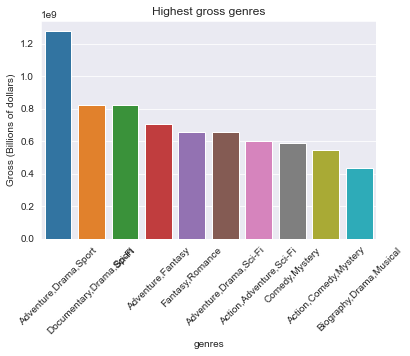

In [65]:
# Using seaborn library, we plot the 50 sample set from the dataset "full_merge" with the highest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.barplot(data=full_merge_max, x="genres", y="global_sum");
plt.xticks(rotation=45);
plt.ylabel("Gross (Billions of dollars)");
plt.title("Highest gross genres");
plt.savefig("genres_high_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 6. Create a subset with 10 samples, with the lowest global gross (sum of domestic and foreign).

In [66]:
full_merge_min = full_merge.groupby('genres',  as_index=False).mean().nsmallest(5, 'global_sum')
full_merge_min

,genres,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,global_sum
116,"Biography,Documentary,Drama",21600.0,105000.0,2011.0,2010.0,94.0,7.2,1566.0,126600.0
263,"Thriller,Western",21100.0,300000.0,2010.0,2010.0,95.0,6.4,7874.0,321100.0
53,"Action,Horror,Mystery",5500.0,364000.0,2012.0,2012.0,114.0,5.1,18206.0,369500.0
108,"Animation,Drama,Sci-Fi",138000.0,318000.0,2014.0,2013.0,122.0,6.5,15996.0,456000.0
166,"Comedy,Mystery,Romance",119000.0,421000.0,2011.0,2010.0,86.0,5.7,11858.0,540000.0


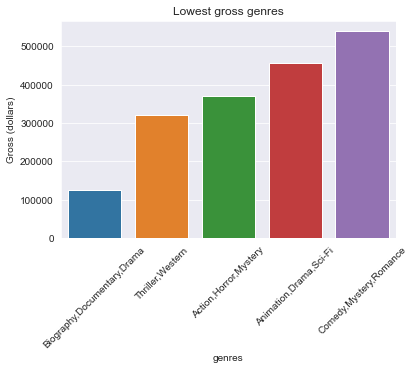

In [67]:
# Using seaborn library, we plot the 50 sample set from the dataset "full_merge" with the lowest revenues
# X axis represents all genres distributed within the 50 sample set.
# Y axis represents the revenues values.
sns.set_style("darkgrid")
sns.barplot(data=full_merge_min, x="genres", y="global_sum");
plt.xticks(rotation=45);
plt.ylabel("Gross (dollars)");
plt.title("Lowest gross genres");
plt.savefig("genres_low_gross.png",
            bbox_inches ="tight",
            orientation ='landscape');

- Step 7. Obtain statistical information about the highest and lowest gross genres

In [37]:
full_merge_max['global_sum'].describe()

count    1.000000e+01
mean     1.284070e+09
std      6.984399e+07
min      1.159400e+09
25%      1.251200e+09
50%      1.276400e+09
75%      1.326825e+09
max      1.405400e+09
Name: global_sum, dtype: float64

In [38]:
full_merge_max['genres'].value_counts()

Action,Adventure,Sci-Fi       4
Adventure,Animation,Comedy    2
Action,Adventure,Fantasy      1
Adventure,Drama,Sport         1
Fantasy,Romance               1
Action,Adventure,Animation    1
Name: genres, dtype: int64

In [39]:
full_merge_min['global_sum'].describe()

count       10.000000
mean     22130.000000
std      14169.846702
min      10800.000000
25%      10800.000000
50%      11900.000000
75%      38525.000000
max      38700.000000
Name: global_sum, dtype: float64

In [40]:
full_merge_min['genres'].value_counts()

Drama                            4
Comedy,Drama,Romance             2
Horror,Thriller                  1
Biography,Documentary,History    1
Horror                           1
Thriller                         1
Name: genres, dtype: int64

- Step 8. Obtain statistics from our "population"

In [41]:
full_merge['global_sum'].describe()

count    1.803000e+03
mean     1.288335e+08
std      2.088373e+08
min      1.080000e+04
25%      1.000000e+07
50%      4.810000e+07
75%      1.489000e+08
max      1.405400e+09
Name: global_sum, dtype: float64

In [42]:
full_merge['genres'].value_counts()

Drama                         128
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  62
                             ... 
Action,Comedy,Sport             1
Action,Comedy,Western           1
Drama,Romance,War               1
Adventure,Mystery,Sci-Fi        1
Fantasy,Thriller                1
Name: genres, Length: 264, dtype: int64

#### What can be conclued for question b?
- ADVENTURE has the highest-gross genre. Moreover, it is combined with other genres like action, Sci-Fi, Comedy or Thriller.

- DRAMA, COMEDY and HORROR stand as the lowest-gross genres.

### Conclusions for both questions
- There is an almost linear behaviour between genre and revenues. This might be due to a genre's acceptance between viewers, as not all genres are suitable for all audiences.
- On the other hand, the relationship bewteen genre and average ratings is not seen at all, although DOCUMENTARY and DRAMA are most common in high and low ratings, respectively.
- Interestingly, even though DOCUMENTARY is a well-rated genre, its revenues are no match against the ADVENTURE genre. On the other hand, DRAMA is a genre which is both terribly rated and low-revenued.

# Sage's Section
## Relationship between director and revenues

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)

# Neil's Section
## Relationship between ratings and runtime

### Does a movie's runtime affect the rating it recieves?

- Step 1. JOIN movie_basics to movie_ratings table

In [5]:
pd.read_sql("""
SELECT *
FROM movie_basics
    JOIN movie_ratings
        USING (movie_id)
;
""", conn)

NameError: name 'conn' is not defined

- Step 2. Aggregate the AVG of runtime_minutes, show only non-null values, and since numvotes had a range from 5 to 90,000 we want to set a minimum baseline of 100 so results are not skewed or biased

In [10]:
pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes >= 100
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", conn)

,averagerating,Average Runtime
0,9.9,138.000000
1,9.7,142.000000
2,9.6,119.750000
3,9.5,89.666667
4,9.4,92.363636
...,...,...
84,1.4,85.083333
85,1.3,92.750000
86,1.2,84.214286
87,1.1,92.666667


- Step 3: Assign these results to a variable named Correlation_Data

In [7]:
Correlation_Data = pd.read_sql("""
SELECT averagerating, AVG(runtime_minutes) AS "Average Runtime"
FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes >= 100
GROUP BY averagerating
ORDER BY averagerating DESC
;
""", conn)
Correlation_Data

,averagerating,Average Runtime
0,9.9,138.000000
1,9.7,142.000000
2,9.6,119.750000
3,9.5,89.666667
4,9.4,92.363636
...,...,...
84,1.4,85.083333
85,1.3,92.750000
86,1.2,84.214286
87,1.1,92.666667


- Step 5: Conduct two-tailed t-test for hypothesis testing
### Use 115.0 minutes as a divider between short and long movies
### Null Hypothesis: The runtime of a movie has no influence on the rating it recieves
### Alternative Hypothesis: The runtime of a movie does have an influence on the rating it recieves
### Set alpha = 0.05

In [12]:
long_movies = Correlation_Data[Correlation_Data["Average Runtime"]>=115.0]["averagerating"]
short_movies = Correlation_Data[Correlation_Data["Average Runtime"]<115.0]["averagerating"]

In [17]:
alpha = 0.05
stats.ttest_ind(long_movies, short_movies)

Ttest_indResult(statistic=6.082044445100752, pvalue=3.085579539579667e-08)

### Since our p value is less than alpha of 0.05, we have enough evidence to reject the null hypothesis

- Step 6: Display the results of the SQL Table into a scatter plot visualization

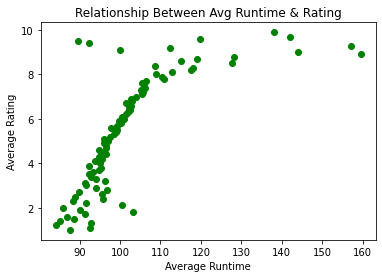

In [8]:
plt.scatter(Correlation_Data['Average Runtime'], Correlation_Data['averagerating'], color = 'green')
plt.xlabel('Average Runtime')
plt.ylabel('Average Rating')
plt.title('Relationship Between Avg Runtime & Rating')
plt.show()

# Mahan's Section
## Relationship between 

- Does a movie's genre have an impact in mean gross revenues?
- Top 5 genres with most gross revenues (info from 2020 and 2021)